# Курс аналитик данных на Python
## Модуль 7.1 А/Б-тестирование с помощью Python. Гипотезы

In [180]:
import pandas as pd #https://pandas.pydata.org/
import numpy as np #https://www.numpy.org/
import scipy as sc #https://www.scipy.org/
import matplotlib.pyplot as plt #https://matplotlib.org/
import seaborn as sns #https://seaborn.pydata.org/
import plotly  # import dash, jupyter_dash #https://plot.ly/
%matplotlib inline 

import warnings
warnings.simplefilter('ignore')

**_Статистическая гипотеза (statistical hypothesys)_** — это определённое предположение о распределении вероятностей, лежащем в основе наблюдаемой выборки данных.

**_Проверка статистической гипотезы (testing statistical hypotheses)_** — это процесс принятия решения о том, противоречит ли рассматриваемая статистическая гипотеза наблюдаемой выборке данных.

**_Статистический тест или статистический критерий_** — строгое математическое правило, по которому принимается или отвергается статистическая гипотеза. 

**$H_0$** — основная гипотеза  
**$H_1$** — альтернативная гипотеза (может быть "не $H_0$")

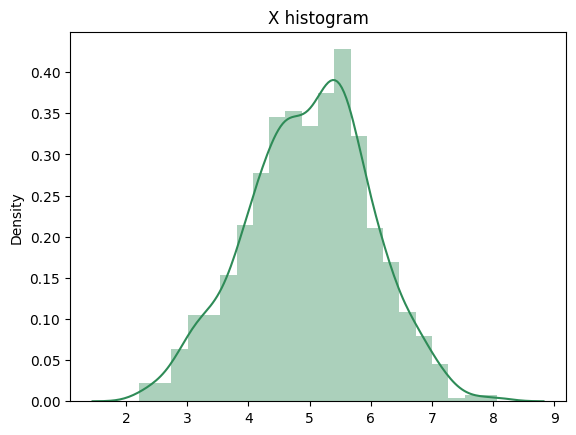

In [181]:
N = 1000
X = np.random.normal(5, 1, N)  # Матожидание 5, дисперсия 1
sns.distplot(X[:], color='seagreen')
plt.title('X histogram')

plt.show()

Пример простой гипотезы. Известно, что X имеет распределение $~\mathcal{N}(\mu, 1)$.  
**$H_0$**: $\mu = 1$  
**$H_1$**: $\mu \ne 1$  

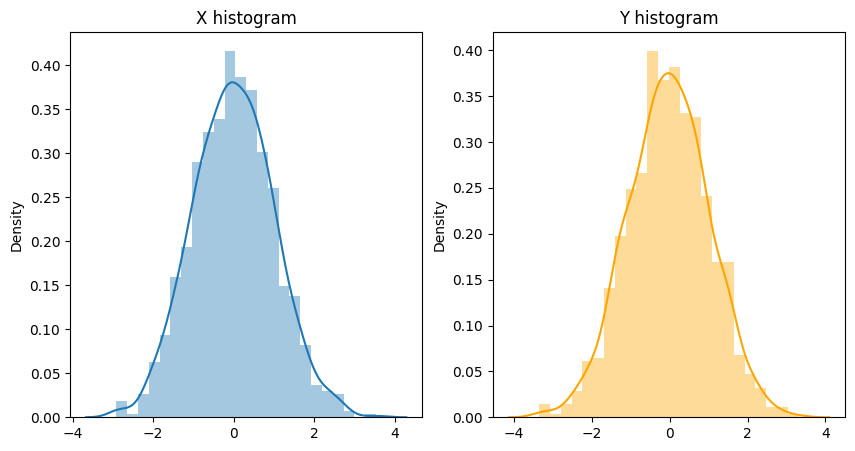

In [182]:
#Сгенерируем по 1000 образцов из стандартного нормального распределения, нарисуем их гистограммы
N = 1000
X = np.random.normal(0, 1, (N))
Y = np.random.normal(0, 1, (N))

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(X)
plt.title('X histogram')

plt.subplot(1, 2, 2)
sns.distplot(Y, color='orange')
plt.title('Y histogram')

plt.show()

Пример более реальной гипотезы в тестировании:  
**$H_0$** -- выборки X и Y принадлежат нормальному распределению с одинаковыми математическим ожиданием и дисперсией.  
**$H_1$** -- выборки X и Y принадлежат к различным распределениям (возможно, различным только по параметрам/моментам), отрицание нулевой гипотезы.

In [183]:
#Выборочное среднее:
X_ = X.sum()/N
print('Выборочное среднее для X: {:.2}'.format(X_))
Y_ = Y.sum()/N
print('Выборочное среднее для Y: {:.2}'.format(Y_))

Выборочное среднее для X: 0.0013
Выборочное среднее для Y: -0.031


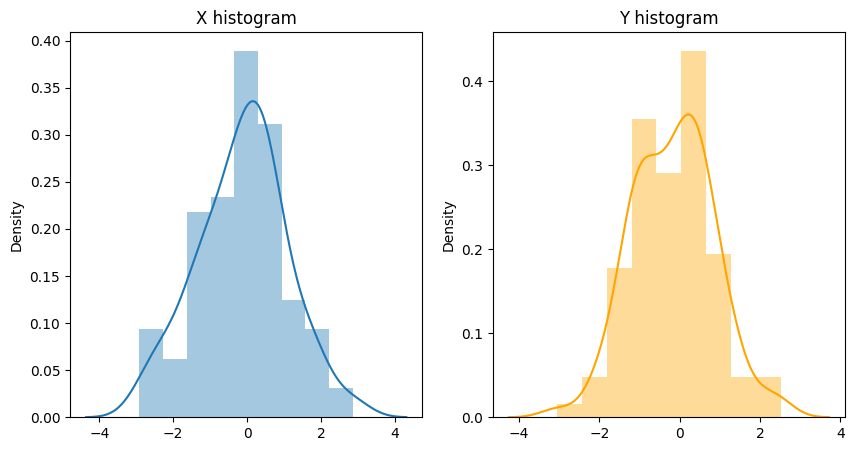

In [184]:
#Сгенерируем по 1000 образцов из стандартного нормального распределения, нарисуем их гистограммы
N = 100
X = np.random.normal(0, 1, (N))
Y = np.random.normal(0, 1, (N))

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.subplot(1, 2, 1)
sns.distplot(X)
plt.title('X histogram')

plt.subplot(1, 2, 2)
sns.distplot(Y, color='orange')
plt.title('Y histogram')

plt.show()

In [185]:
#Выборочное среднее:
X_ = X.sum()/N
print('Выборочное среднее для X: {:.2}'.format(X_))
Y_ = Y.sum()/N
print('Выборочное среднее для Y: {:.2}'.format(Y_))

Выборочное среднее для X: -0.12
Выборочное среднее для Y: -0.17


**Верная гипотеза**
|  | **$H_0$** | **$H_1$** |
|:-:| -: | -: |
| **$H_0$** | Верно принята | Неверно принята<br>(Ошибка *второго* рода) |
| **$H_1$** | Неверно принята<br>(Ошибка *первого* рода) | Верно отвергнута |

**Результат применения критерия**
Есть некоторые правила, позволяющие применять или отвергать гипотезу **$H_0$**

**_Уровень значимости_** = вероятность ошибки первого рода, $\alpha$ ($\alpha$-value). То есть мы отвергли **$H_0$**, когда она верна

**_Мощность критерия_** = (1 - вероятность ошибки второго рода),  $(1-\beta )$. Чем выше мощность критерия, тем выше его уровень значимости.

**_Домашнее задание_**  
Представтье, что вы продаёте чайники в интернете. Представим, что мы тестируем новую функциональность сайта, которая, предполагается, будет увеличивать продажи/выручку в день. Мы разделили всех пользователей случайным образом на две независимых группы, одной из них показываем старую функциональность, а другой новую. Проводим тест один месяц.    
1. Сгенерируйте две искусственных выборки, которые могли бы отражать характеристики продаж чайников (количество продаж в день, сумма продаж в день, что-нибудь ещё) в обеих группах.  
2. Визуализируйте эти данные. Постройте гистограммы, посчитайте описательные статистики с помощью таких функций, как: np.mean(), np.std(), np.median(), sc.stats.mode().
3. Попробуйте сформулировать разные гипотезы **$H_0$** и **$H_1$**.

In [186]:
# Подключаем нужные библиотеки
import numpy as np
import pandas as pd
import seaborn as sns

In [187]:
# Сгенерируем массив данных ДО
n = 1000
sales = np.random.random_integers(10,100, n)
sum_sales = np.random.random_integers(5000,25000, n)
grade = np.random.random_integers(5,10, n)
df_1 = pd.DataFrame({'sales' : sales, 'sum_sales' : sum_sales, 'grade' : grade})
df_1.head()

,sales,sum_sales,grade
0,77,22943,9
1,10,14449,8
2,19,9361,6
3,18,16423,5
4,75,8202,7


In [188]:
df_1.describe()

,sales,sum_sales,grade
count,1000.000000,1000.000000,1000.000000
mean,55.214000,14873.872000,7.438000
std,26.253866,5765.574096,1.679576
min,10.000000,5000.000000,5.000000
25%,33.000000,9794.750000,6.000000
50%,55.000000,14824.500000,7.000000
75%,77.000000,19990.250000,9.000000
max,100.000000,24886.000000,10.000000


In [189]:
# Сгенерируем массив данных ПОСЛЕ
n = 1000
sales = np.random.random_integers(20,150, n)
sum_sales = np.random.random_integers(10000,35000, n)
grade = np.random.random_integers(5,10, n)
df_2 = pd.DataFrame({'sales' : sales, 'sum_sales' : sum_sales, 'grade' : grade})
df_2.head()

,sales,sum_sales,grade
0,50,29501,9
1,57,28463,6
2,29,30559,9
3,103,15457,9
4,62,17133,6


In [190]:
df_2.describe()

,sales,sum_sales,grade
count,1000.000000,1000.000000,1000.00000
mean,85.313000,22139.103000,7.54100
std,38.265929,7240.230117,1.69682
min,20.000000,10023.000000,5.00000
25%,51.000000,15718.500000,6.00000
50%,86.000000,22096.000000,8.00000
75%,118.000000,28242.750000,9.00000
max,150.000000,34964.000000,10.00000


<Axes: ylabel='Density'>

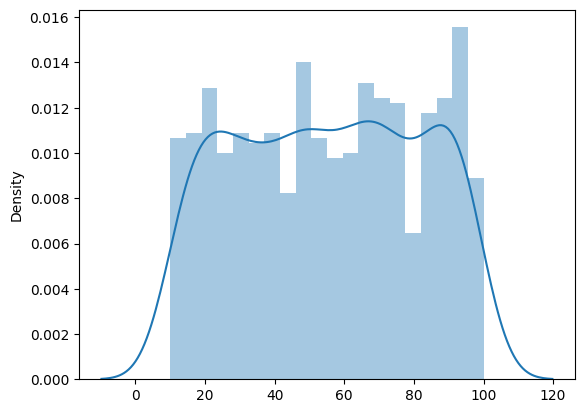

In [195]:
sns.distplot(df_1, x=df_1['sales'], bins=20)

<Axes: ylabel='Density'>

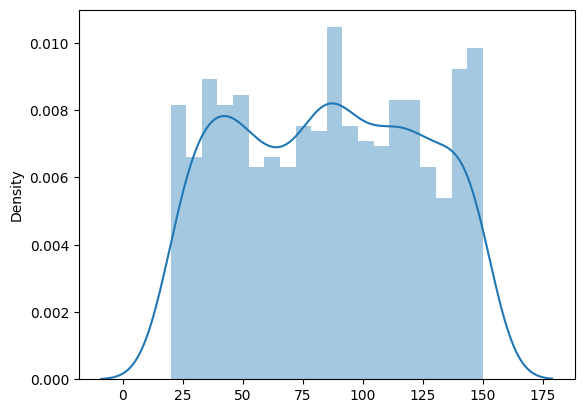

In [192]:
sns.distplot(df_2, x=df_2['sales'], bins=20)

In [193]:
print(f'{np.mean(df_1)}, {np.std(df_1)}, {np.median(df_1)}, {sc.stats.mode(df_1)}')
print()
print(f'{np.mean(df_2)}, {np.std(df_2)}, {np.median(df_2)}, {sc.stats.mode(df_2)}')


sales           55.214
sum_sales    14873.872
grade            7.438
dtype: float64, sales          26.240736
sum_sales    5762.690588
grade           1.678736
dtype: float64, 55.0, ModeResult(mode=array([[  88, 6647,    6]]), count=array([[ 24,   2, 184]]))

sales           85.313
sum_sales    22139.103
grade            7.541
dtype: float64, sales          38.246791
sum_sales    7236.609096
grade           1.695971
dtype: float64, 86.0, ModeResult(mode=array([[   86, 10044,     6]]), count=array([[ 19,   2, 179]]))


**$H_0$** - количество продаж увеличилось после мат. стимулирования

**$H_1$** - количество продаж осталось неизменным